### ``Benchmarks results``

#### ``Size of compressed files``

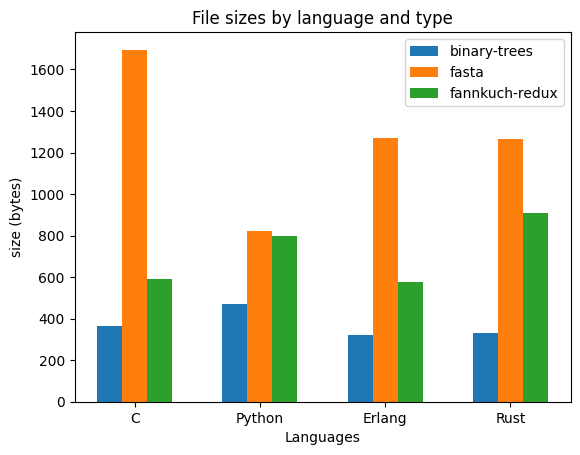

In [2]:
import matplotlib.pyplot as plt

data = {
    'C': {'binary-trees': 363, 'fasta': 1695, 'fannkuch-redux': 591},
    'Python': {'binary-trees': 472, 'fasta': 823, 'fannkuch-redux': 797},
    'Erlang': {'binary-trees': 320, 'fasta': 1268, 'fannkuch-redux': 576},
    'Rust': {'binary-trees': 332, 'fasta': 1265, 'fannkuch-redux': 907}
}

# Extracting data
languages = list(data.keys())
file_types = list(data['C'].keys())
sizes = {file_type: [data[language][file_type] for language in languages] for file_type in file_types}

# Plotting
bar_width = 0.2
index = range(len(languages))

for i, (file_type, size) in enumerate(sizes.items()):
    plt.bar([x + i * bar_width for x in index], size, bar_width, label=file_type)

plt.xlabel('Languages')
plt.ylabel('size (bytes)')
plt.title('File sizes by language and type')
plt.xticks([x + bar_width for x in index], languages)
plt.legend()
plt.show()


#### ``Time, CPU time and memory usage``

#### ``Compilation Options for C``
- **`-O0`** : the default level, which allows for faster compilation and facilitates debugging.
- **`-O1`** : enables basic optimizations aimed at reducing execution time and required space.
- **`-O2`** : a higher level of optimization than `-O1`, focusing on optimizing code performance.
- **`-O3`** : optimizes the size of the generated code and maximizes program speed.
- **`-Os`** : optimizes the code for size. It enables all `-O2` optimizations that do not increase the size of the code.

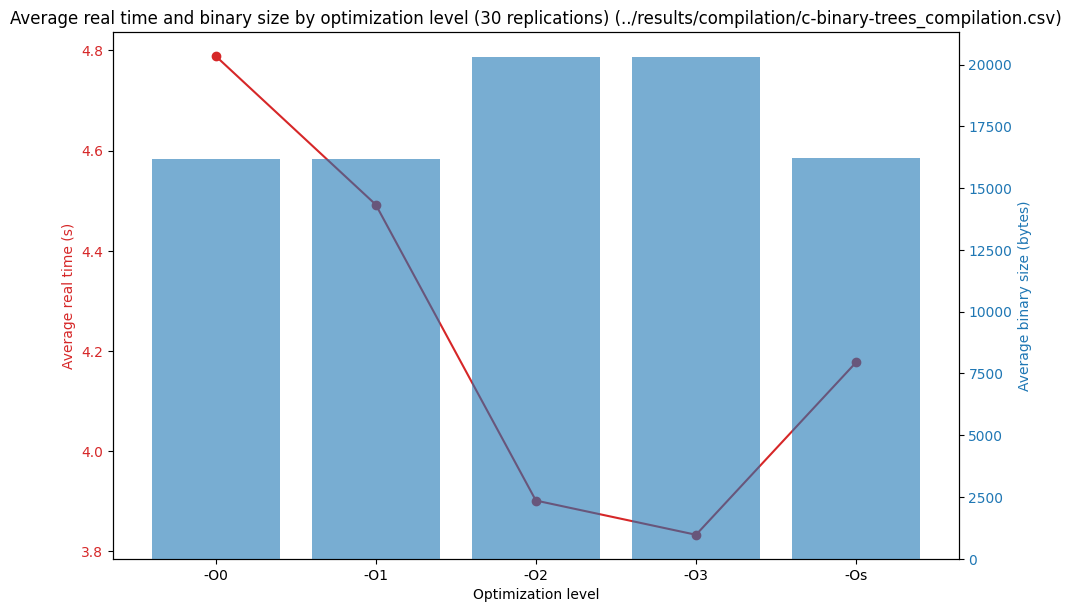

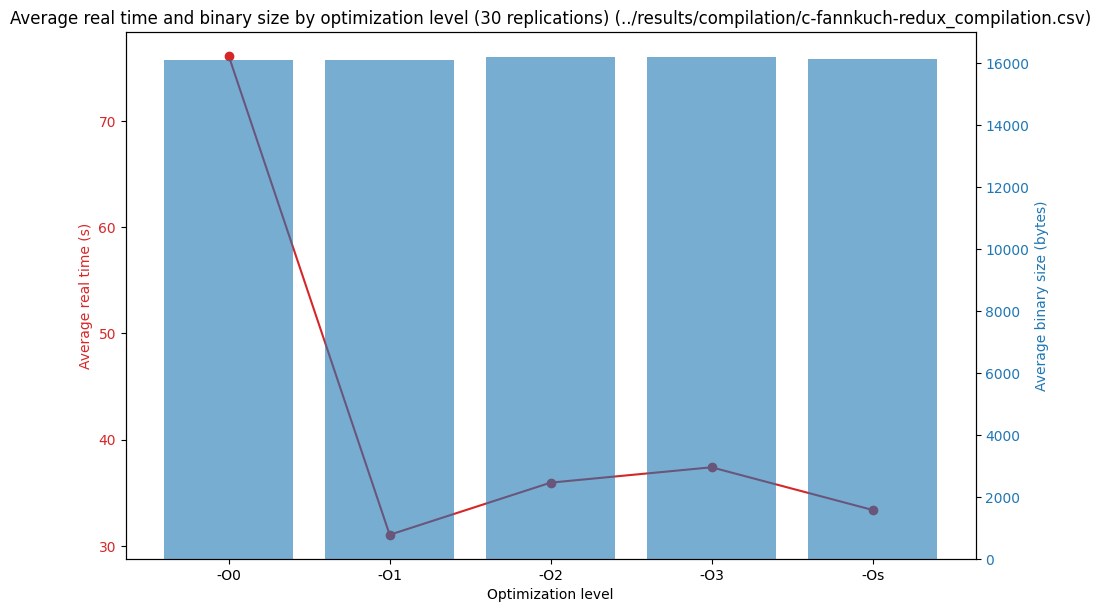

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    '../results/compilation/c-binary-trees_compilation.csv',
    '../results/compilation/c-fannkuch-redux_compilation.csv'
]

for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data = data[data['Real Time(s)'] != ' Compilation Failed']

    data['Real Time(s)'] = pd.to_numeric(data['Real Time(s)'], errors='coerce')
    data['User Time(s)'] = pd.to_numeric(data['User Time(s)'], errors='coerce')
    data['System Time(s)'] = pd.to_numeric(data['System Time(s)'], errors='coerce')
    data['Binary Size(bytes)'] = pd.to_numeric(data['Binary Size(bytes)'], errors='coerce')

    averages = data.groupby('Optimization').mean().reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Optimization level')
    ax1.set_ylabel('Average real time (s)', color=color)
    ax1.plot(averages['Optimization'], averages['Real Time(s)'], color=color, marker='o', label='Average real time')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Average binary size (bytes)', color=color)
    ax2.bar(averages['Optimization'], averages['Binary Size(bytes)'], color=color, alpha=0.6, label='Average binary size')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Average real time and binary size by optimization level (30 replications) ({csv_file})')
    plt.show()

``Rust``

``Option compilation``

* ``-C opt-level=0`` : minimal optimization / generates larger binaries that are less optimized in terms of execution speed / generates more straightforward machine code, closely resembling the original source code

* ``-C opt-level=1``: some basic optimizations like slight code rearrangements and removal of unused code may be performed

* ``-C opt-level=2`` : applies a range of optimizations that aim to improve the runtime performance / advanced loop transformations, aggressive inlining of functions and dead code elimination

* ``-C opt-level=3``: + additional aggressive optimizations that can sometimes lead to larger binary sizes / focus is on maximizing execution speed, possibly at the expense of increased compilation time and binary size. 

* ``-C opt-level=s``: designed to produce smaller binary and performs optimizations that might reduce the speed

* ``-C opt-level=z``: level for reducing binazy size / sacrificing more execution performance than level ``s``

/home/reydvz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


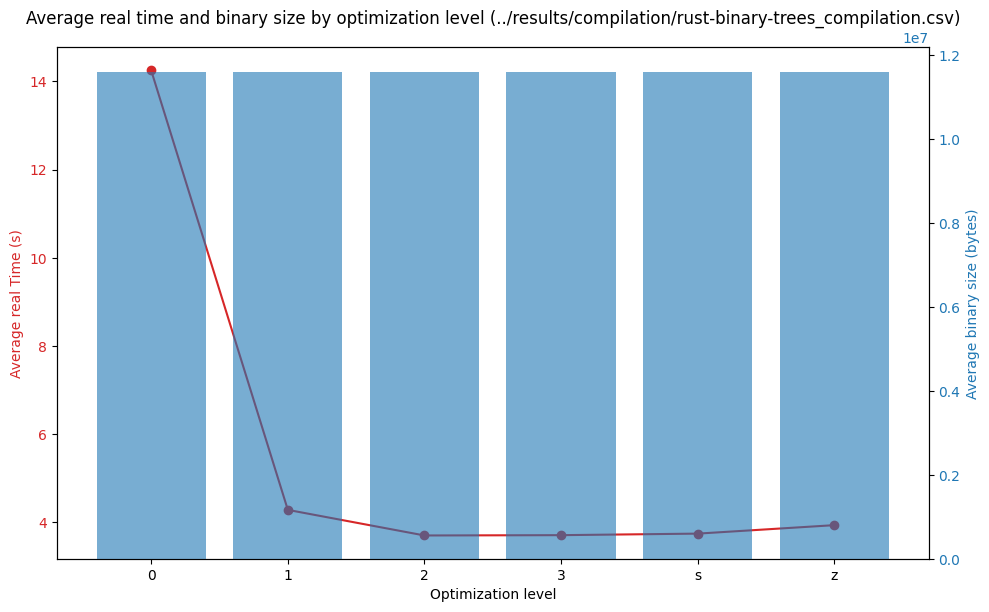

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [
    '../results/compilation/rust-binary-trees_compilation.csv'
]

for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data = data[data['Real Time(s)'] != ' Compilation Failed']

    data['Real Time(s)'] = pd.to_numeric(data['Real Time(s)'], errors='coerce')
    data['User Time(s)'] = pd.to_numeric(data['User Time(s)'], errors='coerce')
    data['System Time(s)'] = pd.to_numeric(data['System Time(s)'], errors='coerce')
    data['Binary Size(bytes)'] = pd.to_numeric(data['Binary Size(bytes)'], errors='coerce')

    averages = data.groupby('Optimization').mean().reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Optimization level')
    ax1.set_ylabel('Average real Time (s)', color=color)
    ax1.plot(averages['Optimization'], averages['Real Time(s)'], color=color, marker='o', label='Average real Time')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Average binary size (bytes)', color=color)
    ax2.bar(averages['Optimization'], averages['Binary Size(bytes)'], color=color, alpha=0.6, label='Average binary Size')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Average real time and binary size by optimization level ({csv_file})')
    plt.show()

``Rust``



``Options compilation for Rust``

### ``Calculus (floating operations)``

* The provided results from benchmarks in C, Python, and Rust for both float (32-bit) and double (64-bit) operations providing insight into the performance characteristics and efficiency of floating-point computations across these languages. 

* The results for both float and double operations are consistent, with minor variations in the least significant digits. This consistency is expected due to the use of **IEEE 754** standards for floating-point arithmetic in modern computing environments.

``Analysis``

* ``C`` shows the fastest execution times for both float and double operations among the three languages. This performance is expected as C is a lower-level language that provides close to hardware execution efficiency.
The times for float and double operations are very close, with double operations being slightly faster in multiplication but slower in addition and division.

* ``Python`` shows significantly longer execution times compared to C and Rust. This is because Python is a higher-level, interpreted language with additional overhead for type checking and dynamic dispatch that can slow down execution, especially in computationally intensive tasks.

* ``Rust`` execution times are closer to those of ``C``, reflecting its efficiency and performance optimization capabilities.

``Perfomance/Results differences``

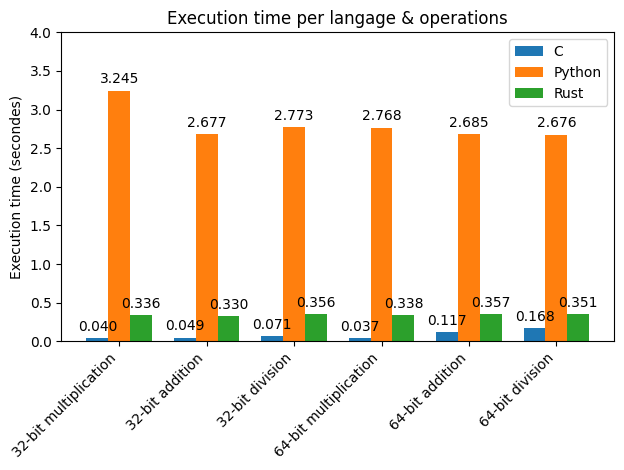

In [11]:
import matplotlib.pyplot as plt
import numpy as np

operations = ['32-bit multiplication', '32-bit addition', '32-bit division', '64-bit multiplication', '64-bit addition', '64-bit division']
times_c = [0.039686, 0.048914, 0.071309, 0.037459, 0.116861, 0.167760]
times_python = [3.244994, 2.677444, 2.772597, 2.767900, 2.684509, 2.676056]
times_rust = [0.336470, 0.329845, 0.356023, 0.338277, 0.356930, 0.351496]

x = np.arange(len(operations)) 
width = 0.25 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, times_c, width, label='C')
rects2 = ax.bar(x, times_python, width, label='Python')
rects3 = ax.bar(x + width, times_rust, width, label='Rust')

ax.set_ylabel('Execution time (secondes)')
ax.set_title('Execution time per langage & operations')
ax.set_xticks(x)
ax.set_xticklabels(operations, rotation=45, ha="right")
ax.set_ylim(0, 4)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(round(height, 5)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

### ``Matrix calculation and floating operations``

``Matrix multiplication algorithm``

The calculation of an element $c_{ij}$ in the resulting matrix $C$ is done by summing the products of corresponding elements from the $i^{th}$ row of $A$ and the $j^{th}$ column of $B$

$c_{ij} = \sum_{k=1}^{n} a_{ik} \times b_{kj}$

``Potential differences across languages``

* **Floating point precision** : single vs double precision

* **Arithmetic algorithm** : performing arithmetic operations (addition, multiplication, addition) may differ between langages

* **Compiler / Interpreter** : way compilers or interpreters handle optimization / floating-point operations can also introduce "minor" variations.


``How C, C++, Rust, Pyton and Ruby handle floating operations ?``

``C/C++`` : order of operations follows the rules of arithmetic in programming, adhering to operator precedence and associativity

- Floating-point operations are executed according to the compiled instructions, with hardware (like the CPU's floating-point unit) directly handling the operations. Memory handling for floating-point numbers involves storing them in specific floating-point registers or memory locations


``Rust`` : same arithmetic rules as C and C++.  (LLVM)

``Python`` : order of floating-point operations in Python follows the standard mathematical precedence, and operations are dynamically typed.
PVM executes the bytecode instructions corresponding to these operations.

``Ruby`` : floating-point operations in Ruby follow mathematical precedence and are dynamically typed.

``C/C++``

*IBM*

"*By default, the compiler generates a single non-IEEE 754 compatible multiply-and-add instruction for binary floating-point expressions, such as a + b * c, partly because one instruction is faster than two. Because no rounding occurs between the multiply and add operations, this might also produce a more precise result. However, the increased precision might lead to different results from those obtained in other environments, and might cause x*y-x*y to produce a nonzero result. To avoid these issues, you can suppress the generation of multiply-add instructions by using the -qfloat=nomaf option*"


``Fused Multiply-Add (FMA)``

FMA is an arithmetic operation performed in a single step, where a multiplication followed by an addition (a + b * c) is executed as one instruction. This is in contrast to performing the multiplication and addition as two separate instructions, which is the traditional approach.


``Options for gcc (C)``

- `-ffast-math`: enables optimizations for floating-point operations that may compromise precision and IEEE/ISO standards compliance.

- `-ffloat-store`: forces floating-point variables to be stored in memory, avoiding precision issues due to differences in precision between registers and memory.

- `-ffp-contract=off`: disables the merging of floating-point operations into a single operation, such as fused multiply-add (FMA).

- `-ffp-contract=on`: a the merging of floating-point operations into a single operation (FMA) when the compiler deems it beneficial.

- `-mfpmath=sse`: uses SSE instructions for floating-point operations on architectures that support them, favoring performance and precision.

- `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

- `-frounding-math`: preserves and respects floating-point rounding rules, which can reduce optimizations.

- `-fsignaling-nans`: supports the use of signaling NaNs (SNaNs) according to IEEE specifications. SNaNs are used to generate exceptions when utilized in floating-point operations.

``Differences``

We have run a bash script that performs a diff on the output for different compilation options. 

Here are our results : 

``-ffastmath and -mfpmath=387``

Reminder :
- (1) `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

- (2) `-ffast-math`: enables optimizations for floating-point operations that may compromise precision and IEEE/ISO standards compliance.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/7kXDmvM/diff1.png" alt="diff1">

```-ffloatstore and -mfpmath=387```

Reminder : 
* (1) ``-ffloat-store``: forces floating-point variables to be stored in memory, avoiding precision issues due to differences in precision between registers and memory.

* (2) ``-mfpmath=387`` : uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/1GXHgn1/diff2.png" alt="diff2">

```-ffp-contract=off and -mfmath=387```

Reminder : 

* (1) `-ffp-contract=off`: disables the merging of floating-point operations into a single operation, such as fused multiply-add (FMA).

* (2) `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/YfV8mqh/diff3.png" alt="diff3">

``ffp-contract=on and -mfmath=387``
- (1) `-ffp-contract=on`: a the merging of floating-point operations into a single operation (FMA) when the compiler deems it beneficial.

- (2) - `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Gpfk89Z/diff4.png" alt="diff4">

``-mfpmath=387 and frounding-math``
- (1) `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

- (2) `-frounding-math`: preserves and respects floating-point rounding rules, which can reduce optimizations.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/k4fwx2k/diff5.png" alt="diff5">

``-mfpmath=387 and frounding-math``

* (1)  `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

* (2) `-fsignaling-nans`: supports the use of signaling NaNs (SNaNs) according to IEEE specifications. SNaNs are used to generate exceptions when utilized in floating-point operations.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/T2H6FSr/diff6.png" alt="diff6">

``mfmath=sse and -mfpmath=387``

* (1) `-mfpmath=sse`: uses SSE instructions for floating-point operations on architectures that support them, favoring performance and precision.

* (2)  `-mfpmath=387`: uses the x87 floating-point unit for floating-point operations, typical of older x86 architectures.

Streaming SIMD Extensions (SSE) is a technology developed by Intel and first introduced with the Pentium III processor in 1999. SSE is designed to enhance performance by performing parallel computations on multiple pieces of data.

With SSE, you can load multiple floating-point numbers into SSE registers and perform the addition on four (or more, depending on the SSE version) numbers at once, reducing the number of iterations needed.

While SSE can offer faster computations, it's important to note that the way SSE handles floating-point arithmetic can sometimes lead to slight differences in precision compared to scalar operations. This is due to the SIMD nature of SSE that might use different rounding strategies or order of operations, potentially affecting the final results in sensitive computations.


<a href="https://imgbb.com/"><img src="https://i.ibb.co/6DqTg4p/diff7.png" alt="diff7">

All differences involved the ``mfpmath=387``.

* ``-mfpmath=387`` option instructs the compiler to use the ``x87 floating-point processor`` unit for performing floating-point operations. 

x87 processors have been the standard for floating-point calculations on x86 architectures before the introduction of SSE. Using the x87 unit might offer better precision for some operations because it supports an internal ``80-bit (extended precision)`` representation for floating-point numbers, in addition to the ``32-bit (single precision)`` and ``64-bit (double precision)`` formats.

``Why results may differ``

*  **the x87 unit can maintain higher precision during intermediate calculations** 

* optimizations (like ``-ffast-math``) may change the order of operations and use approximations, leading to slightly different results.

* options like ``-ffloat-store`` (forces the compiler to store floating-point variables in heir precision format when stored in memory) and ``-frounding-math`` (disables certain optimizations on default rouding of floating-point operations) reduce optimizations that might otherwise introduce rounding errors, leading to subtle differences in final results.

``Which options to perform floating operations``

* If performance is a critical point : ``-ffast-math`` might be the most suitable option because it enables optimizations that can improve execution speed

* If precision and adherence to IEEE floating-point standard are important, using ``-mfpmath=387`` is a good option (higher precision) or ``-mfpmath=sse`` (better performance on modern processors)